# Α. Στοιχεία Ομάδας
***
***

|Όνομα|ΑΜ|Ομάδα|
|-|-|-|
|Λιάτσος Γεώργιος-Ελευθέριος|03114026|Α11|
|Κουτρούλης Σπυραντώνης     |03114864|Α11|

In [0]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
!pip install -U imbalanced-learn #upgrade imbalanced-learn package

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)


***
***
# Β. Εισαγωγή του dataset
***
***

### B1. Παρουσίαση του dataset
 Τα δεδομένα αποτελούν στοιχεία της σιλουέτας 4 αυτοκινήτων(van,saab,opel,bus) τα οποία εθεάθησαν απο διάφορες γωνίες για να γίνουν οι απαραίτητες μετρήσεις


#### Διάβασμα των αρχείων και δημιουργία του πίνακα με τα δεδομένα

In [0]:
import pandas as pd
import numpy as np

A = ['a','b','c','d','e','f','g','h','i']
a = []
for i in A:
    a.append(pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xa"+ '{}'.format(i) + ".dat",header=None,delim_whitespace=True))
    
x = pd.concat([a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8]])
x.shape

(846, 19)

### B2. Δείγματα και χαρακτηριστικά 

 Το μέγεθος του dataset το βρήκαμε απο πάνω. Οπότε ο αριθμός των δειγμάτων είναι 846 και ο αριθμός των χαρακτηριστικών είναι 18 + 1 της κλάσης.

 Τα χαρακτηριστικά αναγράφονται στο αρχείο "vehicle.doc" στον ίδιο φάκελο με τα αρχεία data και είναι τα εξής : 
 
    1.COMPACTNESS (average perim)**2/area
	2.CIRCULARITY (average radius)**2/area
	3.CIRCULARITY area/(av.distance from border)**2
	4.RATIO (max.rad-min.rad)/av.radius
	5.PR.AXIS ASPECT RATIO (minor axis)/(major axis)
	6.MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length)
	7.SCATTER RATIO (inertia about minor axis)/(inertia about major axis)
	8.ELONGATEDNESS area/(shrink width)**2
	9.PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width)
    10.MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)
    11.SCALED VARIANCE ALONG MAJOR AXIS (2nd order moment about minor axis)/area
	12.SCALED VARIANCE ALONG MINOR AXIS (2nd order moment about major axis)/area
	13.SCALED RADIUS OF GYRATION (mavar+mivar)/area
	14.SKEWNESS ABOUT MAJOR AXIS (3rd order moment about major axis)/sigma_min**3
	15.SKEWNESS ABOUT MINOR AXIS (3rd order moment about minor axis)/sigma_maj**3
	16.ABOUT MINOR AXIS (4th order moment about major axis)/sigma_min**4
	17.KURTOSIS ABOUT MAJOR AXIS (4th order moment about minor axis)/sigma_maj**4
	18.HOLLOWS RATIO (area of hollows)/(area of bounding polygon)
    19.CLASS
 
 #### Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά

#### Αλλαγή ονομάτων στηλών σύμφωνα με τα attributes

In [0]:
attributes = ['COMPACTNESS','CIRCULARITY','DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO','ELONGATEDNESS',
              'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE(MAJOR AXIS)','SCALED VARIETY(MINOR AXIS)','SCALED RADIUS OF GYRATION',
              'SKEWNESS(MAJOR AXIS)','SKEWNESS(MINOR AXIS)','KURTOSIS(MINOR AXIS)','KURTOSIS(MAJOR AXIS)','HOLLOWS RATIO','CLASS']
for i in range(0,19):
    x.rename(columns = {i:attributes[i]},inplace=True)
x.head()    

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE(MAJOR AXIS),SCALED VARIETY(MINOR AXIS),SCALED RADIUS OF GYRATION,SKEWNESS(MAJOR AXIS),SKEWNESS(MINOR AXIS),KURTOSIS(MINOR AXIS),KURTOSIS(MAJOR AXIS),HOLLOWS RATIO,CLASS
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Β3. Επικεφαλίδες και αρίθμηση γραμμών

 Όταν πρωτοδιαβάσαμε το αρχείο παρατηρήσαμε πως δεν υπάρχει επικεφαλίδα οπότε με την επιλογή header=None της εντολής read_table της βιβλιοθήκης pandas εξασφαλίσαμε μια ομαλή απεικόνιση. Όσον αφορά την αρίθμηση, το αρχείο δεν περιείχε απο μόνο του οπότε αφήσαμε το pandas να κάνει τη δουλειά του indexing με τη δική του αρίθμηση. 

### Β4.  Κλάσεις 

Εύκολα μπορούμε να δούμε απο πάνω πως η κολόνα class βρίσκεται στην 19η θέση και από τα χαρακτηριστικά φαίνεται πως οι ετικέτες των κλάσεων είναι 4 : van,saab,opel,bus

### Β5. Μετατροπές στα αρχεία

- header = None για να διαβάσουμε το αρχείο χωρίς επικεφαλίδα
- delim_whitespace = True γιατί διάβαζε κάποια κενά στην τελευταία στήλη επειδή αν δούμε τις κλάσεις κάποιες είναι 4 γράμματα και κάποιες 3. Οπότε έπρεπε να αγνοήσουμε τα κενά για την ομαλή συνέχεια
- Τα δεδομένα βρίσκονταν σε 8 διαφορετικά αρχεία. Αφού τα διαβάσαμε και τα κάναμε ένα ένα append σε μία κενή λίστα, κάναμε concat τα στοιχεία της λίστας για να έχουμε ένα συγκεντρωτικό dataframe
- Δημιουργήσαμε τον πίνακα με τα attributes και τον προσαρμόσαμε στο dataframe

### B6. Απουσιάζουσες τιμές


In [0]:
x.isnull().values.any()

False

Ελέγχουμε αν υπάρχουν απουσιάζουσες τιμές. **Δεν υπάρχουν.**

### B7. Έλεγχος εξισορροπημένου dataset

In [0]:
# Έλεγχος μονο της στήλης CLASS
y = x.loc[:,['CLASS']]

# Get dummies για τα classes μας
y = pd.get_dummies(y)

# Εύρεση ποσοστών δειγμάτων επί του συνόλου
avg = (y.T.sum(axis=1))/y.shape[0]

print(avg)

CLASS_bus     0.257683
CLASS_opel    0.250591
CLASS_saab    0.256501
CLASS_van     0.235225
dtype: float64


Παρατηρούμε λοιπόν πως το dataset **είναι εξισορροπημένο**.

### Β8. Διαχωρισμός σε train και test set (20%)

In [0]:
from sklearn.model_selection import train_test_split

# KNN train, test set
features = np.array(x.drop(['CLASS'],1))
labels = np.array(x['CLASS'])

train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.20)

# Εύρεση αριθμού δειγμάτων κάθε κλάσης στο test set
num = y.T.sum(axis=1)
num = [num[0],num[1],num[2],num[3]]
print(num)

[218, 212, 217, 199]


***
***
# Γ. Baseline classification
***
***

## *** Γ1. Train - Test ***

### Δήλωση συναρτήσεων

Δημιουργούμε μια συνάρτηση, την ***mets*** που θα τυπώνει και θα επιστρέφει τις f1 micro και macro για κάθε ταξινομητή, καθώς και μία άλλη συνάρτηση, την ***conmat*** που θα δημιουργεί και θα τυπώνει το confusion matrix του κάθε ταξινομητή στη μορφή που θέλουμε, καθώς και το classification report. 

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

def mets(lbls,prds,name):
    f1_micro = f1_score(lbls,prds,average='micro')
    f1_macro = f1_score(lbls,prds,average='macro')
    print("**" + name + " AVGS**")
    print("f1 micro avg = " ,f1_micro)
    print("f1 macro avg = " ,f1_macro, "\n")
    return [f1_micro,f1_macro]
  
def conmat(lbls,prds,lb_names):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(lbls, prds)
    df = pd.DataFrame(cnf_matrix)
    df.columns = lb_names
    df['Class'] = lb_names
    df.set_index("Class",inplace=True)
     
    print(classification_report(lbls, prds, target_names=lb_names))
    return df
       

### a) Dummy

#### Dummy Metrics

In [0]:
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

dc_default = DummyClassifier()
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_bus = DummyClassifier(strategy="constant", constant='bus')
dc_constant_opel = DummyClassifier(strategy="constant", constant='opel')
dc_constant_saab = DummyClassifier(strategy="constant", constant='saab')
dc_constant_van = DummyClassifier(strategy="constant", constant='van')
dc_most_frequent = DummyClassifier(strategy="most_frequent")

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
dc_default.fit(train, train_labels)
dc_uniform.fit(train, train_labels)
dc_constant_bus.fit(train, train_labels)
dc_constant_opel.fit(train, train_labels)
dc_constant_saab.fit(train, train_labels)
dc_constant_van.fit(train, train_labels)
dc_most_frequent.fit(train, train_labels)

#με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds_default = dc_default.predict(test)
preds_uniform = dc_uniform.predict(test)
preds_constant_van = dc_constant_van.predict(test)
preds_constant_opel = dc_constant_opel.predict(test)
preds_constant_saab = dc_constant_saab.predict(test)
preds_constant_bus = dc_constant_bus.predict(test)
preds_most_frequent = dc_most_frequent.predict(test)

# Τυπώνουμε τα AVG με την κλήση της συνάρτησης mets
dummy_metrics_default = mets(test_labels,preds_default,"DUMMY DEFAULT")
dummy_metrics_uniform = mets(test_labels,preds_uniform,"DUMMY UNIFORM")
dummy_metrics_van = mets(test_labels,preds_constant_van,"DUMMY VAN")
dummy_metrics_opel = mets(test_labels,preds_constant_opel,"DUMMY OPEL")
dummy_metrics_saab = mets(test_labels,preds_constant_saab,"DUMMY SAAB")
dummy_metrics_bus = mets(test_labels,preds_constant_bus,"DUMMY BUS")
dummy_metrics_most_frequent = mets(test_labels,preds_most_frequent,"DUMMY MOST FREQUENT")

**DUMMY DEFAULT AVGS**
f1 micro avg =  0.20588235294117646
f1 macro avg =  0.20481934001670843 

**DUMMY UNIFORM AVGS**
f1 micro avg =  0.2235294117647059
f1 macro avg =  0.22390030086108517 

**DUMMY VAN AVGS**
f1 micro avg =  0.2529411764705882
f1 macro avg =  0.10093896713615023 

**DUMMY OPEL AVGS**
f1 micro avg =  0.22941176470588234
f1 macro avg =  0.09330143540669855 

**DUMMY SAAB AVGS**
f1 micro avg =  0.2647058823529412
f1 macro avg =  0.10465116279069768 

**DUMMY BUS AVGS**
f1 micro avg =  0.2529411764705882
f1 macro avg =  0.10093896713615023 

**DUMMY MOST FREQUENT AVGS**
f1 micro avg =  0.2529411764705882
f1 macro avg =  0.10093896713615023 



#### Dummy Confusion Matrix

In [0]:
label_names = np.array(['bus','opel','saab','van'])
print("Default Matrices\n")
default_conmat = conmat(test_labels,preds_default,label_names)
default_conmat

Default Matrices

              precision    recall  f1-score   support

         bus       0.24      0.21      0.22        43
        opel       0.18      0.21      0.19        39
        saab       0.22      0.24      0.23        45
         van       0.19      0.16      0.18        43

   micro avg       0.21      0.21      0.21       170
   macro avg       0.21      0.21      0.20       170
weighted avg       0.21      0.21      0.21       170



,bus,opel,saab,van
Class,,,,
bus,9,11,16,7
opel,6,8,13,12
saab,11,12,11,11
van,12,14,10,7


In [0]:
print("Uniform Matrices\n")
uniform_conmat = conmat(test_labels,preds_uniform,label_names)
uniform_conmat

Uniform Matrices

              precision    recall  f1-score   support

         bus       0.23      0.26      0.24        43
        opel       0.11      0.13      0.12        39
        saab       0.28      0.24      0.26        45
         van       0.29      0.26      0.27        43

   micro avg       0.22      0.22      0.22       170
   macro avg       0.23      0.22      0.22       170
weighted avg       0.23      0.22      0.23       170



,bus,opel,saab,van
Class,,,,
bus,11,13,10,9
opel,18,5,7,9
saab,10,15,11,9
van,8,13,11,11


In [0]:
print("Constant Bus Matrices\n")
bus_conmat = conmat(test_labels,preds_constant_bus,label_names)
bus_conmat

Constant Bus Matrices

              precision    recall  f1-score   support

         bus       0.25      1.00      0.40        43
        opel       0.00      0.00      0.00        39
        saab       0.00      0.00      0.00        45
         van       0.00      0.00      0.00        43

   micro avg       0.25      0.25      0.25       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.25      0.10       170



,bus,opel,saab,van
Class,,,,
bus,43,0,0,0
opel,39,0,0,0
saab,45,0,0,0
van,43,0,0,0


In [0]:
print("Constant Opel Matrices\n")
opel_conmat = conmat(test_labels,preds_constant_opel,label_names)
opel_conmat

Constant Opel Matrices

              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        43
        opel       0.23      1.00      0.37        39
        saab       0.00      0.00      0.00        45
         van       0.00      0.00      0.00        43

   micro avg       0.23      0.23      0.23       170
   macro avg       0.06      0.25      0.09       170
weighted avg       0.05      0.23      0.09       170



,bus,opel,saab,van
Class,,,,
bus,0,43,0,0
opel,0,39,0,0
saab,0,45,0,0
van,0,43,0,0


In [0]:
print("Constant Saab Matrices\n")
saab_conmat = conmat(test_labels,preds_constant_saab,label_names)
saab_conmat

Constant Saab Matrices

              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        43
        opel       0.00      0.00      0.00        39
        saab       0.26      1.00      0.42        45
         van       0.00      0.00      0.00        43

   micro avg       0.26      0.26      0.26       170
   macro avg       0.07      0.25      0.10       170
weighted avg       0.07      0.26      0.11       170



,bus,opel,saab,van
Class,,,,
bus,0,0,43,0
opel,0,0,39,0
saab,0,0,45,0
van,0,0,43,0


In [0]:
print("Constant Van Matrices\n")
van_conmat = conmat(test_labels,preds_constant_van,label_names)
van_conmat

Constant Van Matrices

              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        43
        opel       0.00      0.00      0.00        39
        saab       0.00      0.00      0.00        45
         van       0.25      1.00      0.40        43

   micro avg       0.25      0.25      0.25       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.25      0.10       170



,bus,opel,saab,van
Class,,,,
bus,0,0,0,43
opel,0,0,0,39
saab,0,0,0,45
van,0,0,0,43


In [0]:
print("Most Frequent Matrices\n")
most_frequent_conmat = conmat(test_labels,preds_most_frequent,label_names)
most_frequent_conmat

Most Frequent Matrices

              precision    recall  f1-score   support

         bus       0.25      1.00      0.40        43
        opel       0.00      0.00      0.00        39
        saab       0.00      0.00      0.00        45
         van       0.00      0.00      0.00        43

   micro avg       0.25      0.25      0.25       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.25      0.10       170



,bus,opel,saab,van
Class,,,,
bus,43,0,0,0
opel,39,0,0,0
saab,45,0,0,0
van,43,0,0,0


### b) kNN

#### kNN Metrics

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train,train_labels)

preds = knn.predict(test)

knn_metrics = mets(test_labels,preds,"kNN")

**kNN AVGS**
f1 micro avg =  0.6235294117647059
f1 macro avg =  0.6196590266966766 



#### kNN Confusion Matrix

In [0]:
label_names = np.array(['bus','opel','saab','van'])

print("kNN Matrices\n")
knn_conmat = conmat(test_labels,preds,label_names)
knn_conmat

kNN Matrices

              precision    recall  f1-score   support

         bus       0.81      0.81      0.81        43
        opel       0.45      0.46      0.46        39
        saab       0.40      0.38      0.39        45
         van       0.80      0.84      0.82        43

   micro avg       0.62      0.62      0.62       170
   macro avg       0.62      0.62      0.62       170
weighted avg       0.62      0.62      0.62       170



,bus,opel,saab,van
Class,,,,
bus,35,1,7,0
opel,2,18,14,5
saab,3,21,17,4
van,3,0,4,36


## *** Γ2. Bar Plot ***

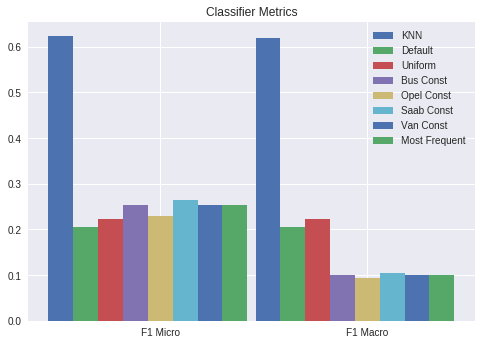

In [0]:
from matplotlib import pyplot as plt

x_axis = ['F1 Micro','F1 Macro']

ind = np.arange(len(x_axis))

plt.xticks(ind,x_axis)

plt.title("Classifier Metrics")
plt.bar(ind-0.48,knn_metrics,width=0.12,label="KNN") 
plt.bar(ind-0.36,dummy_metrics_default,width=0.12,label="Default")
plt.bar(ind-0.24,dummy_metrics_uniform,width=0.12,label="Uniform") 
plt.bar(ind-0.12,dummy_metrics_bus,width=0.12,label="Bus Const") 
plt.bar(ind,dummy_metrics_opel,width=0.12,label="Opel Const")
plt.bar(ind+0.12,dummy_metrics_saab,width=0.12,label="Saab Const") 
plt.bar(ind+0.24,dummy_metrics_van,width=0.12,label="Van Const")
plt.bar(ind+0.36,dummy_metrics_most_frequent,width=0.12,label="Most Frequent")
plt.legend()

## *** Γ3. Σχολιασμός των αποτελεσμάτων ***

Αρχικά παρατηρούμε απο το bar plot πως ο ΚΝΝ δινει τα καλύτερα f1_micro και f1_macro και μάλιστα με τεράστια διαφορά. Συγκεντρωτικά κοιτώντας τα confusion matrices αλλα και το bar plot, μπορούσαμε να υποθέσουμε από την αρχή κιόλας ότι τα ποσοστά των constant dummies και του most_frequent θα ήταν πάρα πολύ χαμηλά αφου το δείγμα μας είναι εξισορροπημένο, οπότε και η υπόθεση ότι κάποια κλαση ήταν κυρίαρχη δε μας έδωσε επιθυμητά αποτελέσματα, αλλά αναμενόμενα. Παρόλο που τα f1_micro, f1_macro ήταν χαμηλά, παρατηρούμε πως και το precision είναι πολύ χαμηλό σε όλα τα constant. Αυτο πρακτικά σημαίνει πως ακόμα και με την υπόθεση ότι υπήρχε κυρίαρχη κλάση, ο dummy classifier "πέτυχε" πολύ λίγα. 

Τελικά λοιπόν η χρήση του ΚΝΝ υπερτερεί αδιαμφισβήτητα στη βελτιστοποίηση της classification.

***
***
# Δ. Βελτιστοποίηση Ταξινομητών
***
***

## Δ1. Βελτιστοποίηση ταξινομητή kNN

### Επιλογή Variance Threshhold

Κληθήκαμε να επιλέξουμε τιμές για το variance threshhold. Αφού υπολογίσαμε το μέγιστο variance να είναι ίσο με περίπου 35000 αποφασίσαμε να δημιουργήσουμε τον πίνακα [0,10000,20000,30000]. Έπειτα από το τρέξιμο του pipe παρατηρήσαμε πως τα βέλτιστα αποτελέσματα ήταν για την τιμή 0 οπότε και αρχίσαμε να μετατοπίζουμε τις τιμές του πίνακα πίνακα σταδιακά προς αυτήν (progressive grid search) μέχρι που φτάσαμε στον τελικό [0,0.001,0.0002,0.0003]. Οπότε σταματήσαμε εκεί αφού πάλι το αποτέλεσμα έβγαινε 0. 

Όταν το δείγμα μας έγινε scaled ξαναυπολογίσαμε το μέγιστο variance και αυτό έβγαινε περίπου 0.06. Ξεκινώντας λοιπόν πάλι με έναν πίνακα [0,0.02,0.004,0.005] καταλήγαμε σε βέλτιστη τιμή το 0. Μειώνοντας 1 τάξη μεγέθους στον πίνακα καταλήξαμε στον τελικό [0,0.0001,0.0002,0.0003,0.0004,0.0005]  κατά τον οποίον τα βέλτιστα αποτελέσματα ίσχυαν είτε για την τιμή 0 είτε για κάποια ενδιάμεση τιμή. Δοκιμάσαμε να τον μειώσουμε κι άλλο άλλα μετά έδιναν όλα 0

In [0]:
# Ευρεση της variance 
train_variance = train.var(axis=0)
print(np.max(train_variance))

30932.939784583934


In [0]:
# Ευρεση της νέας variance 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)

train_variance = train_minmax.var(axis=0)
print(np.max(train_variance))


0.06234191729981446


### Δομή κώδικα

Μέσα σε 1 for δημιουργούμε μια πεντάδα αριθμών χαρακτηριστική για τον αριθμό του Κ, του Threshhold(-1 αν δεν υπάρχει), του αριθμού των components του PCA(-1 αν δεν υπάρχει) και 1 αν το συγκεκριμένο pipe έχει minmax scaler η -1 αν όχι.

Έτσι διαβάζοντας αυτή την πεντάδα αριθμών μπορούμε να αποφανθούμε για τα βέλτιστα στάδια pipeline που αντιστοιχούν στην βέλτιστη τιμή των f1_micro,f1_macro του train

Ορίζουμε :
- Pipe 1 : kNN
- Pipe 2 : kNN + PCA
- Pipe 3 : kNN + Scaler
- Pipe 4 : kNN + Scaler + PCA
- Pipe 5 : kNN + Threshhold
- Pipe 6 : kNN + Threshhold + PCA
- Pipe 7 : kNN + Scaler + Threshhold
- Pipe 8 : kNN + Scaler + Threshhold + PCA

**Δε θα χρησιμοποιήσουμε καθόλου ROS αφού το δείγμα μας είναι εξισορροπημένο**

In [0]:
from sklearn.model_selection import cross_val_score
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

mics = []
macs = []

# Εδώ δημιουργούμε μια λίστα result στην οποία κρατάμε τις τιμές των υπερπαραμέτρων σε κάθε εκτέλεση
# Μπορούμε έτσι μετά να βρούμε το index της max τιμής μιας μετρικής και δίνοντάς το στη λίστα να πάρουμε τις βέλτιστες υπερπαραμέτρους.
neighbors = [1,3,5,7,9,11,13]
v_threshhold = [0,0.001,0.002,0.003]
result = []
pipe = range (1,9)

start_time = time.time()

for p in pipe:
  for k in neighbors:
      knn = KNeighborsClassifier(n_neighbors=k)
      # kNN
      if p == 1:
        micro_scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_micro')
        macro_scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_macro')
        mics.append(micro_scores.mean())
        macs.append(macro_scores.mean())
        result.append([k,-1,-1,1,-1])
      elif p == 2:
        # kNN + PCA
        for n in range(1,train.shape[1]+1):
            pca = PCA(n_components=n)
            trainPCA = pca.fit_transform(train)
            micro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_micro')
            macro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_macro')
            mics.append(micro_scores.mean())
            macs.append(macro_scores.mean())
            result.append([k,-1,n,2,-1])
      else:
        min_max_scaler = preprocessing.MinMaxScaler()
        train_minmax = min_max_scaler.fit_transform(train)
        
        # kNN + Scaler
        if p == 3:
          micro_scores = cross_val_score(knn, train_minmax, train_labels, cv=10, scoring='f1_micro')
          macro_scores = cross_val_score(knn, train_minmax, train_labels, cv=10, scoring='f1_macro')
          mics.append(micro_scores.mean())
          macs.append(macro_scores.mean())
          result.append([k,-1,-1,3,1])
              
        # kNN + Scaler + PCA
        elif p == 4:
          for n in range(1,train_minmax.shape[1]+1):
              pca = PCA(n_components=n)
              trainPCA = pca.fit_transform(train_minmax)
              micro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_micro')
              macro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_macro')
              mics.append(micro_scores.mean())
              macs.append(macro_scores.mean())
              result.append([k,-1,n,4,1])
        else:
          for v in v_threshhold:
            selector = VarianceThreshold(v)
            if p > 6:
              train_reduced = selector.fit_transform(train_minmax)
              s = 1
            else:  
              train_reduced = selector.fit_transform(train)
              s = -1

            # Εδώ έχουμε την περίπτωση που έχω είτε kNN + scaler + threshhold(p=7,p=8) είτε kNN + threshhold(p=5,p=6)
            micro_scores = cross_val_score(knn, train_reduced, train_labels, cv=10, scoring='f1_micro')
            macro_scores = cross_val_score(knn, train_reduced, train_labels, cv=10, scoring='f1_macro')
            mics.append(micro_scores.mean())
            macs.append(macro_scores.mean())
            result.append([k,v,-1,p,s])
            # Εδώ έχουμε την περίτωση που έχω είτε  kΝΝ + scaler + threshhold + PCA είτε kΝΝ + threshhold + PCA(p=6,p=8)
            # Ο PCA θέλουμε να τρέξει μόνο για τα συγκεκριμένα pipes
            if p == 6 or p == 8:
              for n in range(1,train_reduced.shape[1]+1):
                pca = PCA(n_components=n)
                trainPCA = pca.fit_transform(train_reduced)
                micro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_micro')
                macro_scores = cross_val_score(knn, trainPCA, train_labels, cv=10, scoring='f1_macro')
                mics.append(micro_scores.mean())
                macs.append(macro_scores.mean())
                result.append([k,v,n,p,s])

cv_time = time.time() - start_time

### Εύρεση βέλτιστου Pipeline

In [0]:
micro_place = mics.index(max(mics))
macro_place = macs.index(max(macs))
mic = result[micro_place]
mac = result[macro_place]

print('Optimum Pipeline for f1-micro is PIPE',mic[3], ', for k_neighbours =',mic[0],'v_threshold =',mic[1],'PCA',mic[2],'and Minmax =',mic[4])
print('Optimum Pipeline for f1-macro is PIPE',mac[3], ', for k_neighbours =',mac[0],'v_threshold =',mac[1],'PCA',mac[2],'and Minmax =',mac[4])


Optimum Pipeline for f1-micro is PIPE 3 , for k_neighbours = 7 v_threshold = -1 PCA -1 and Minmax = 1
Optimum Pipeline for f1-macro is PIPE 4 , for k_neighbours = 1 v_threshold = -1 PCA 13 and Minmax = 1


** Τώρα, έχοντας βρεί το βέλτιστο pipeline θα πάμε να υπολογίσουμε τα f1_micro,f1_macro για το test  **

In [0]:
# Best Micro
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=mic[0])

min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)
test_minmax = min_max_scaler.transform(test)

knn.fit(train_minmax,train_labels)
preds_micro = knn.predict(test_minmax)
fp1_time = time.time() - start_time
f1_micro = f1_score(test_labels,preds_micro,average='micro')
print("** Pipe 3 AVG Micro**")
print("f1 micro avg = " ,f1_micro, "\n")


# Best macro
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=mac[0])

min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)
test_minmax = min_max_scaler.transform(test)

pca = PCA(n_components=mac[2])
trainPCA = pca.fit_transform(train_minmax)
testPCA = pca.transform(test_minmax)

knn.fit(trainPCA,train_labels)
preds_macro = knn.predict(testPCA)
fp2_time = time.time() - start_time
f1_macro = f1_score(test_labels,preds_macro,average='macro')
print("** Pipe 4 AVG Macro**")
print("f1 macro avg = " ,f1_macro, "\n")


** Pipe 3 AVG Micro**
f1 micro avg =  0.6705882352941176 

** Pipe 4 AVG Macro**
f1 macro avg =  0.6912895183531227 



### Εκτύπωση Confusion Matrix για τo βέλτιστο Pipeline

Το καλύτερο f1_micro μας βγήκε για το Pipe 3

In [0]:
df_micro = conmat(test_labels,preds_micro,label_names)
df_micro

              precision    recall  f1-score   support

         bus       0.89      0.98      0.93        43
        opel       0.40      0.41      0.41        39
        saab       0.45      0.38      0.41        45
         van       0.87      0.91      0.89        43

   micro avg       0.67      0.67      0.67       170
   macro avg       0.65      0.67      0.66       170
weighted avg       0.66      0.67      0.66       170



,bus,opel,saab,van
Class,,,,
bus,42,0,0,1
opel,2,16,19,2
saab,2,23,17,3
van,1,1,2,39


Το καλύτερο f1_macro μας βγήκε για το Pipe 4

In [0]:
df_macro = conmat(test_labels,preds_macro,label_names)
df_macro

              precision    recall  f1-score   support

         bus       0.91      0.93      0.92        43
        opel       0.44      0.44      0.44        39
        saab       0.51      0.47      0.49        45
         van       0.89      0.95      0.92        43

   micro avg       0.70      0.70      0.70       170
   macro avg       0.69      0.70      0.69       170
weighted avg       0.69      0.70      0.69       170



,bus,opel,saab,van
Class,,,,
bus,40,1,1,1
opel,2,17,18,2
saab,2,20,21,2
van,0,1,1,41


## Δ2. Χρόνοι εκτέλεσης

In [0]:
print('Cross Validation time for optimum Pipeline = ',cv_time)
print('Fit - Predict time for optimum Pipeline for micro= ',fp1_time)
print('Fit - Predict time for optimum Pipeline for macro= ',fp2_time)

CV time for optimum Pipeline =  322.8191120624542
FP time for optimum Pipeline for micro=  0.015915870666503906
FP time for optimum Pipeline for macro=  0.014788627624511719


## Δ3. Bar Plot

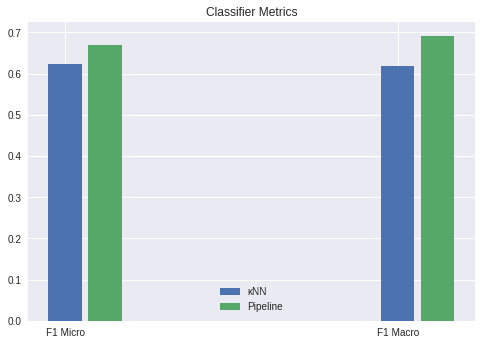

In [0]:
from matplotlib import pyplot as plt

x_axis = ['F1 Micro','F1 Macro']
ind = np.arange(len(x_axis))

plt.xticks(ind,x_axis)

plt.title("Classifier Metrics")

plt.bar(ind,[knn_metrics[0],knn_metrics[1]],width=0.10,label="κΝΝ")
plt.bar(ind+0.12,[f1_micro,f1_macro],width=0.10,label="Pipeline") 

plt.legend()


## Δ4. Μεταβολή Επίδοσης kNN

In [0]:
dscore = np.array([[knn_metrics[0] ,knn_metrics[1]],
                   [f1_micro,f1_macro],
                   [(f1_micro - knn_metrics[0])/knn_metrics[0]*100,(f1_macro - knn_metrics[1])/knn_metrics[1]*100]])


cols = ['kNN','Pipeline', '% Μεταβολή']

df = pd.DataFrame(dscore.T,columns = cols)
df['F1'] = ['f1_micro','f1_macro']
df.set_index('F1',inplace=True)
df


,kNN,Pipeline,% Μεταβολή
F1,,,
f1_micro,0.623529,0.670588,7.547170
f1_macro,0.619659,0.691290,11.559662


## Δ5. Σχολιασμός των αποτελεσμάτων

Παρατηρούμε βελτίωση του ταξινομητή σε όλα τα pipelines αλλά αυτά που ξεχωρίζουν είναι αυτά στα οποία χρησιμοποιήθηκε ο minmax scaler. Εξ αυτών ξεχωρίζουν τα pipes κΝΝ + scaler και kNN + Scaler + PCA. Στο cross validation μας αποφασίσαμε να εξαντλησουμε σχεδόν όλουςτους πιθανούς συνδυασμούς γι'αυτό και το cv_time μας παίρνει λίγο παραπάνω. Κρίνοντας από το αποτέλεσμα θα μπορούσαμε να το περιορίσουμε πάρα πολύ, αλλά προτιμούμε να δείξουμε τη διαδικασία που το υλοποιήσαμε. Δε χρησιμοποιήσαμε ROS αφου το δείγμα μας ήταν εξισορροπημένο, οπότε και το θεωρήσαμε περιττό. Τέλος παρατηρούμε, όπως υποδεικνύει και ο τελευταίος πίνακας που τυπώσαμε, βελτίωση στο f1_micro κατά 7,55% με χρήση του Pipeline : kNN + scaler, και βελτίωση του f1_macro κατά 11,56% με χρήση του Pipeline : kNN + scaler + PCA